# バンディットとEluder Dimension 

参考
* [Eluder dimension and the sample complexity of optimistic exploration](https://papers.nips.cc/paper_files/paper/2013/hash/41bfd20a38bb1b0bec75acf0845530a7-Abstract.html)


**表記と設定**

* 行動の集合: $\mathcal{A}$
* 実数関数の集合: $\mathcal{F}=\{f_\rho : \mathcal{A}\to \mathbb{R}\mid \rho \in \Theta\}$
    * $\rho \in \Theta$はパラメータです
    * 任意の$f \in \mathcal{F}$について$f(a) \in [0, C]$とします．
    * $R_t-f_\theta(A_t)$は$\eta$-sub-gaussianとします． 
    * 確率変数$\theta$は真の報酬関数$f_\theta$を表すとします．つまり，$\mathbb{E}[R_t \mid H_t, \theta, A_t]=f_\theta(A_t)$とします．
* 時刻$t$で，報酬$R_t$を観測した後，エージェントはランダムな行動の集合$\mathcal{A}_t \subseteq \mathcal{A}$から行動を一つ選択します．
* $H_t$は履歴$(\mathcal{A}_1, A_1, R_1, \dots, \mathcal{A}_{t-1}, A_{t-1}, R_{t-1}, \mathcal{A}_t)$を表します．
* $\pi=\{\pi_t\mid t\in \mathbb{N}\}$はエージェントの方策を表します．$\pi_t: \mathcal{H} \to \Delta(\mathcal{A})$とします．
* $\arg\max_{a\in \mathcal{A}_t} f(a)$は空ではないとします．
* リグレット: $\mathcal{R}(T, \pi)=\sum^T_{t=1}[f_\theta(A^*_t) - f_\theta(A_t)]$とします．
    * ここで，$A^*_t$は$\arg\max_{a\in \mathcal{A}_t} f_\theta(a)$としました．

**モチベーション**

上の問題設定は文脈付きバンディットや線形バンディットを内包します．
実際，[線形バンディット](./BANDIT_General_contextual.ipynb)では，$d$次元のベクトル$\theta$について，
報酬関数が$\mathbb{E}[R_t \mid H_t, \theta, A_t]=\langle \theta, \phi_t(A_t)\rangle$であるような状況を考えました．また，各時刻で行動の集合$\mathcal{A}_t$が与えられます．

線形バンディットでは$\widetilde{O}(d\sqrt{T})$が最適リグレットでした．より一般の報酬関数のクラスを考えることはできないでしょうか？
例えば，VC次元はどうでしょうか？


## VC次元（ここの説明かなり分かりづらい．．．TODO: 図など）

VC次元は特に二値判別問題のための仮説集合に対して定義される複雑度です．
今回は多値判別問題を考えます．つまり，$n$個の行動の中から一つ最適なものを選択する判別問題です．

* 二値関数の集合$\mathcal{F}=\{f_\rho: \mathcal{A}\to \{0, 1\}\mid \rho \in \{1,\dots, n\}\}$を考えましょう．
* 行動の集合は$\mathcal{A}=\{1,\dots, n\}$とします．
* 報酬関数はパラメータ$\rho$に対して$f_\rho(a)=\mathbb{1}(\rho=a)$を考えます．つまり，真の$a$に対する指示関数です．

このとき，バンディットのVC次元を次のように定義しましょう（後で定義するEluder dimensionの説明に即しています）：

---

**VC独立とVC次元**

次を満たすとき， **「与えられた$\mathcal{F}$に対して行動$a$は$\widetilde{\mathcal{A}}\subseteq \mathcal{A}$に対してVC-独立である」** とします．
* 任意の$f, \widetilde{f}\in \mathcal{F}$について，次を満たす$\bar{f}\in \mathcal{F}$が存在する：
    * $\bar{f}(a)=f(a)$であり，$\bar{f}(\widetilde{a})=\widetilde{f}(\widetilde{a})$ for all $\widetilde{a} \in \widetilde{A}$

例として，$n=3$を考えましょう．
* つまり，$\mathcal{A}=\{1, 2, 3\}$，$\rho \in \{1, 2, 3\}$，$\mathcal{F}=\{f_1, f_2, f_3\}$です．それぞれ以下のとおりです．
    * $f_1(1)=1, f_1(2)=0, f_1(3)=0$
    * $f_2(1)=0, f_2(2)=1, f_2(3)=0$
    * $f_3(1)=0, f_3(2)=0, f_3(3)=1$
* $a=1$, $\widetilde{\mathcal{A}}=\{1, 2\}$とします
  * $f=f_1$, $\widetilde{f}=f_2$のとき，
    * $f(1)=1$なので，$a$で$f=\bar{f}$を満たすのは$\bar{f}=f_1$だけです．一方，$\bar{f}(2)=0\neq \widetilde{f}(2)=1$なので，
「与えられた$\mathcal{F}$に対して行動$a$は$\widetilde{\mathcal{A}}\subseteq \mathcal{A}$に対してVC-依存」です．
* $a=1$, $\widetilde{\mathcal{A}}=\{2, 3\}$とすると，
  * $f=f_1$, $\widetilde{f}=f_2$のとき，
    * $f(1)=1$なので，$a$で$f=\bar{f}$を満たすのは$\bar{f}=f_1$だけです．一方，$\bar{f}(2)=0\neq \widetilde{f}(2)=1$なので，
    「与えられた$\mathcal{F}$に対して行動$a$は$\widetilde{\mathcal{A}}\subseteq \mathcal{A}$に対してVC-依存」です．

上の例では，$\bar{f}=f_1$を$\widetilde{\mathcal{A}}=\{2, 3\}$や$\widetilde{\mathcal{A}}=\{1, 2\}$で調べることで，$a=1$での$f$の値を特定することができます．
つまり，$\widetilde{A}$についてVC-依存な$a$では，$f(\widetilde{a})$の値を調べることで，$a$で発生する値の集合を制限することができます．
これを使って，VC次元は次のように定義されます：

**「与えられた$\mathcal{F}$の$\mathcal{A}$上でのVC次元は，全ての$a\in \widetilde{\mathcal{A}}$が$\widetilde{\mathcal{A}}\setminus \{a\}$についてVC-独立であるような 最大の集合$\widetilde{A}\subseteq \mathcal{A}$の要素数です．**

---

つまり，VC次元が大きいほど，$a=1$での$f$の値を特定しづらいわけですね．
上の例では，VC次元は１になります．
しかし，上の例では明らかに$n$が大きくなると問題が難しくなりそうです．つまり，VC次元はバンディット問題の一般的な複雑度を考える上では適していないかもしれません．
次に見るEluder Dimensionでは，上の例のEluder Dimensionはちゃんと$n$になります．


## VC次元

VC次元は特に二値判別問題のための仮説集合に対して定義される複雑度です．
[MATH_complexity_of_hypothesis.ipynb](MATH_complexity_of_hypothesis.ipynb)を復習しましょう．
仮説集合$\mathcal{F}$と入力空間$\mathcal{X}$に対して，
$$
\Pi_\mathcal{H}(x_1, \cdots, x_n)=|\{(h(x_1), \cdots, h(x_n))\in \mathcal{Y}^n\mid h \in \mathcal{H}\}|
$$
は入力の集合に対する出力の集合の要素数とします．
すると，VC次元は
$$
\operatorname{VC}(\mathcal{H}) = \max\left\{n \in \mathbb{N}\mid \max_{x_1, \cdots, x_n\in \mathcal{X}} \Pi_{\mathcal{H}}(x_1, \cdots, x_n) = 2^n\right\}
$$
として定義されました．

ここで改めて$n$腕バンディット問題を考えましょう．つまり行動の集合は$\mathcal{A}=\{1,\dots, n\}$です．

そして，
$n$個のアームのうち，ひとつだけ１の報酬を取り，それ以外は０であるとします．すなわち，次のような報酬関数の仮説集合を考えれば十分です．

* 二値関数の集合$\mathcal{F}=\{f_\rho: \mathcal{A}\to \{0, 1\}\mid \rho \in \{1,\dots, n\}\}$
として，
$f_\rho(a)=\mathbb{1}(\rho=a)$とします．つまり，$f_\rho$は真の$a$に対する指示関数です．

つまり仮説集合は$|\mathcal{F}|=n$であり，そのVC次元は1です．
（**注意** VC次元が$n$になるのは，$\mathcal{F}$の集合のサイズが$2^n$になる場合です．）
しかし，このバンディット問題は明らかに$n$が大きくなると問題が難しくなります．つまり，VC次元はバンディット問題の一般的な複雑度を考える上では適していないかもしれません．
次に見るEluder Dimensionでは，上の例のEluder Dimensionはちゃんと$n$になります．


## Eluder Dimension

政治家Aが，報道陣を避けながらその政治家人生を過ごす状況を考えましょう．
Aは，なるべく自分の政治的な立ち位置（どの政党に組み入れているか?）を明らかにしないまま過ごしたいと思っています．
しかし，自身の政治姿勢について報道の際にはなんらかの新しい情報を提供しなければならないとします．
このとき，Aはどれくらい長く立ち位置がバレずに過ごせるでしょうか？

これがEluder dimensionの根本的なアイディアです（報道陣から逃げてる政治家をイメージするとわかりやすいですね）．
Eluder Dimensionは次で定義されます：

---

次を満たす時，行動$a$は，集合$\{a_1, \dots, a_n\} \subseteq \mathcal{A}$と$\mathcal{F}$について$\epsilon$-依存であるといいます．

$$
\sqrt{\sum_{j=1}^{i-1}\left(f(a_i)-\widetilde{f}(a_i)\right)^2} \leq \epsilon 
$$
を満たす任意の$f, \widetilde{f} \in \mathcal{F}$が$f(a) - \widetilde{f}(a) \leq \epsilon$を満たす．

**直感**

行動$a$は，$\{a_1, \dots, a_n\}$では同じような予測をするが，$a$でだけ$\epsilon$以上に出力を変える関数$f, \widetilde{f}\in \mathcal{F}$が存在するとき，$\epsilon$-独立になります．
例えば下の図では$n=10$について$a=8$で，$f$と$g$はdisagreeします．

これを使って，Eluder dimensionは次のように定義されます．

**「与えられた$\mathcal{F}$の$\mathcal{A}$上での$\epsilon$に対してのEluder dimensionは，全ての$a\in \widetilde{\mathcal{A}}$が$\widetilde{\mathcal{A}}\setminus \{a\}$について$\epsilon'$-独立であるような$\epsilon' \geq \epsilon$が存在する最大の集合$\widetilde{A}\subseteq \mathcal{A}$の要素数です．**

Eluder dimensionは，関数クラス$\mathcal{F}$の中の関数$f$を他の$g$と区別するために「間違える回数」の最悪ケースを表しています．
これはVC次元とよく似ていますね．[仮説集合の複雑度](MATH_statistical_learning_theory.ipynb)の回を思い出しましょう．

また，ベクトル空間の次元との対応を考えてもわかりやすいです．
ベクトル空間の次元が$d$なのは「ベクトルが独立になるような要素の系列の最大長」でした．
例えば$(1, 0, 0)$と$(0, 1, 0)$によって張られる空間の次元は２ですね．Eluder dimensionはこの一般化であり，線形な構造を持つ必要がないため，より一般的な問題を扱うことができます．


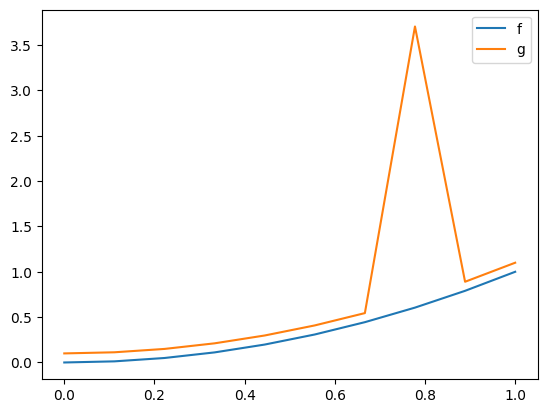

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 1.0, 10)

f = x ** 2
g = x ** 2 + 0.1

g[7] += 3

plt.plot(x, f, label="f")
plt.plot(x, g, label="g")

plt.legend()

TODO: アルゴリズムについて